Plastic waiste and GDP/Population

http://science.sciencemag.org/content/347/6223/768/

Variable time span	2010 – 2010
Data published by	Jambeck, J. R., Geyer, R., Wilcox, C., Siegler, T. R., 
Perryman, M., Andrady, A., ... & Law, K. L. (2015). 

Plastic waste inputs from land into the ocean. Science, 347(6223), 768-771.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
import sklearn.linear_model
import scipy, scipy.stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
%matplotlib inline
import seaborn as sns
import math
from matplotlib import rcParams


##  read the waste GDP and population population data in waste df
waste = pd.read_excel("Combined.xls")
print (waste.isna().sum())
print (waste.describe())
continents_means = waste.groupby('Continent').waste.agg(['mean'])
print (continents_means.head())
 

country       0
Code          0
waste         0
GDP           0
Population    0
Continent     0
dtype: int64
            waste            GDP    Population
count  147.000000     147.000000  1.470000e+02
mean     0.195946   19037.498367  4.297895e+07
std      0.312359   20125.293704  1.535861e+08
min      0.010000     660.210000  9.827000e+03
25%      0.085500    4443.455000  1.341302e+06
50%      0.144000   12005.500000  6.192993e+06
75%      0.222000   28974.035000  3.037405e+07
max      3.600000  125140.840000  1.341335e+09
               mean
Continent          
AF         0.093243
AS         0.168281
EU         0.190839
NOAM       0.404667
OC         0.168154


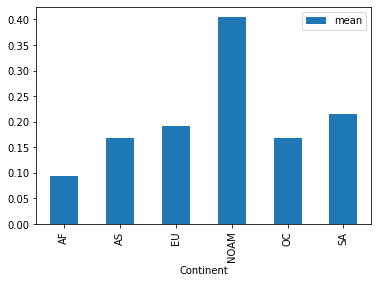

In [2]:
waste.groupby('Continent').waste.agg(['mean']).plot(kind='bar')
plt.savefig('Continents Plastic Waste Bar Chart.png')

C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


            waste           GDP    Population
count  139.000000    139.000000  1.390000e+02
mean     0.196971  17380.952950  4.469963e+07
std      0.316832  15457.068694  1.577191e+08
min      0.010000   1208.280000  9.827000e+03
25%      0.093500   5067.175000  1.341302e+06
50%      0.144000  12005.500000  6.858266e+06
75%      0.222000  28521.585000  3.181150e+07
max      3.600000  72115.840000  1.341335e+09


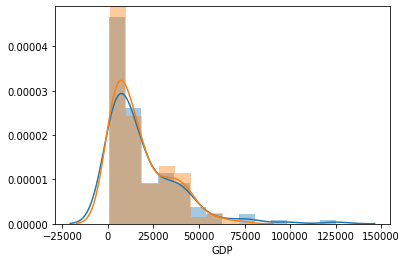

In [3]:
Y = waste["GDP"]
sns.distplot(Y)
P = np.percentile(waste.GDP, [2.5, 97.5])
new_waste = waste[(waste.GDP > P[0]) & (waste.GDP < P[1])]
Y = new_waste["GDP"]
sns.distplot(Y)
print (new_waste.describe())

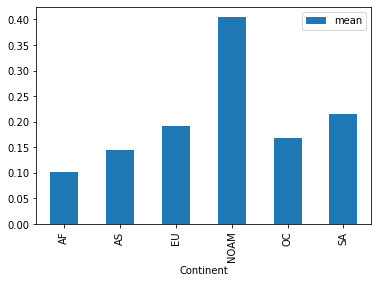

In [4]:
new_waste.groupby('Continent').waste.agg(['mean']).plot(kind='bar')
plt.show()

C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


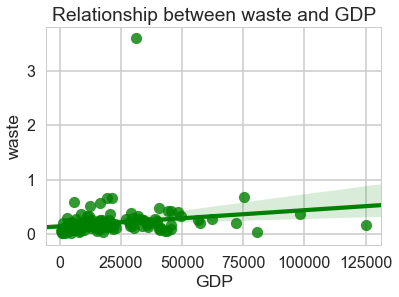

In [5]:
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


sns.regplot(y="waste", x="GDP", data=waste,color = "g" ,fit_reg = True)
plt.title("Relationship between waste and GDP")

plt.savefig('World Wide Plastic Waste GDP Regression Plot.png')

C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


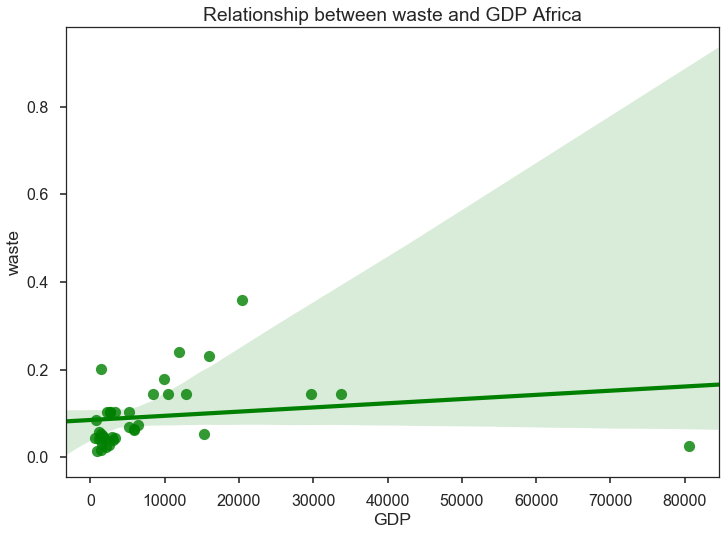

In [6]:
waste_AF = waste[waste["Continent"]== "AF"]
#print (waste_AF.head())
sns.set_style("whitegrid")
sns.set_context("poster")

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.regplot(y="waste", x="GDP", data=waste_AF,color = "g" ,fit_reg = True)
plt.title("Relationship between waste and GDP Africa")
plt.savefig('Africa_GDP.png')

C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


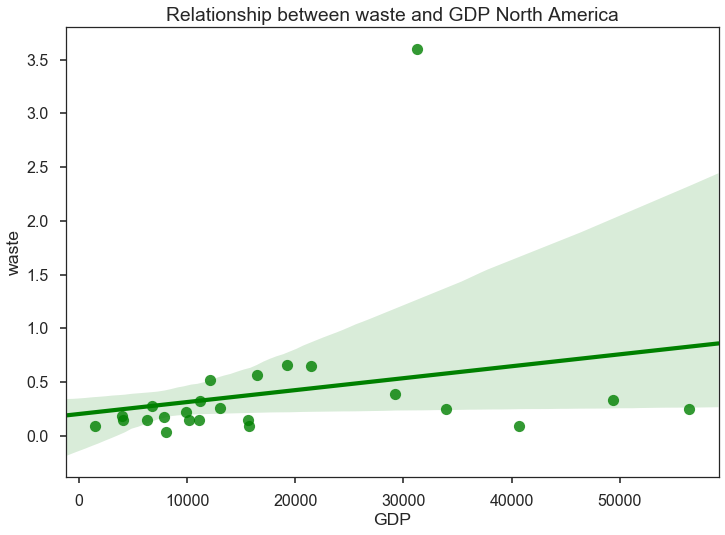

In [7]:
waste_NOAM = waste[waste["Continent"]== "NOAM"]

#print (waste_NOAM.describe())
sns.set_style("whitegrid")
sns.set_context("poster")

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.regplot(y="waste", x="GDP", data=waste_NOAM,color = "g" ,fit_reg = True)
plt.title("Relationship between waste and GDP North America")
plt.savefig('North America_GDP.png')

C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


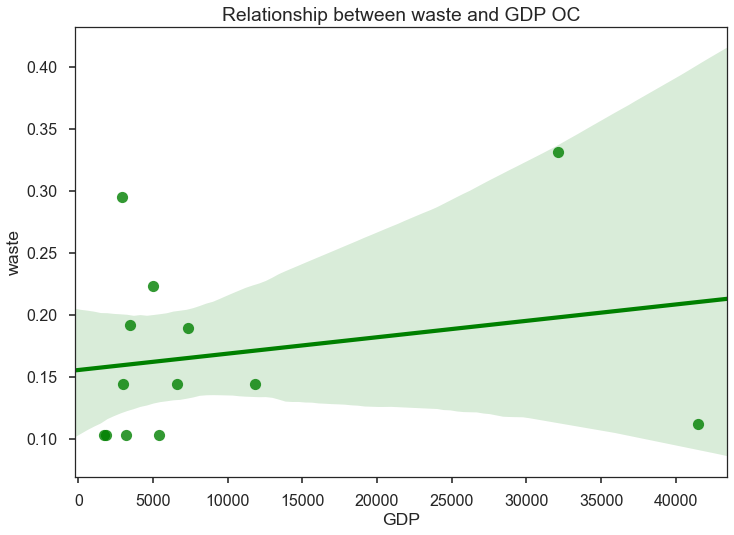

In [8]:
waste_OC = waste[waste["Continent"]== "OC"]

#print (waste_NOAM.describe())
sns.set_style("whitegrid")
sns.set_context("poster")

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.regplot(y="waste", x="GDP", data=waste_OC,color = "g" ,fit_reg = True)
plt.title("Relationship between waste and GDP OC")
plt.savefig('Oceania _ GDP.png')

C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


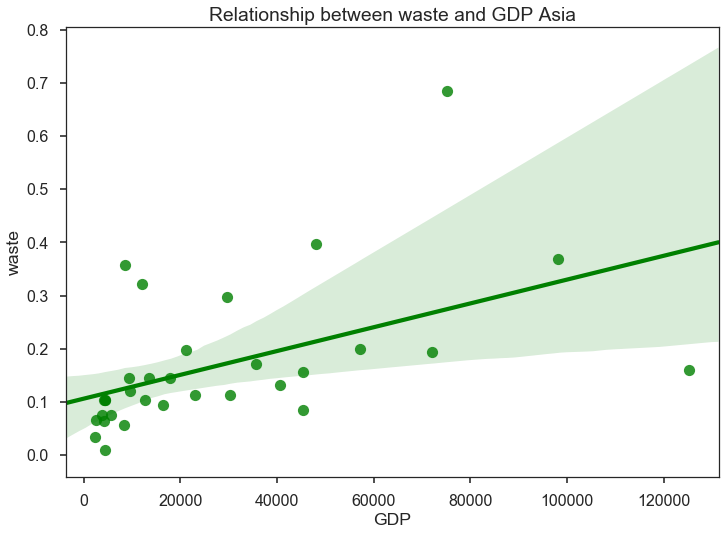

In [9]:
waste_AS = waste[waste["Continent"]== "AS"]

#print (waste_NOAM.describe())
sns.set_style("whitegrid")
sns.set_context("poster")

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.regplot(y="waste", x="GDP", data=waste_AS,color = "g" ,fit_reg = True)
plt.title("Relationship between waste and GDP Asia")
plt.savefig('Asia _ GDP.png')

C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


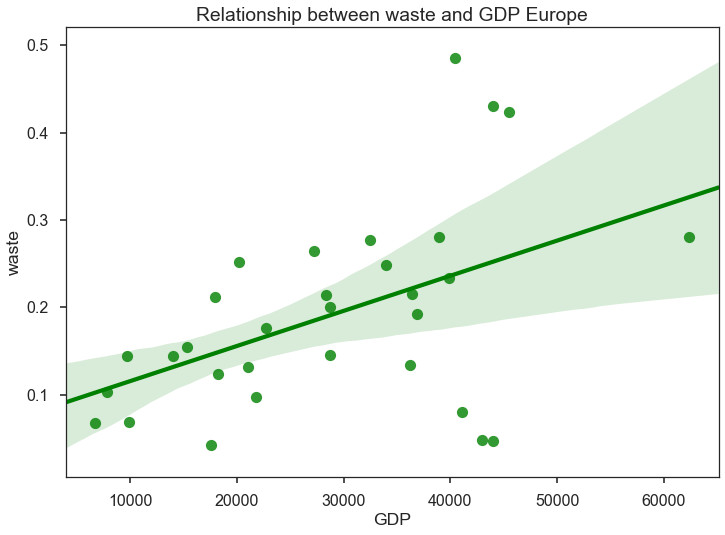

In [10]:
waste_EU = waste[waste["Continent"]== "EU"]

#print (waste_NOAM.describe())
sns.set_style("whitegrid")
sns.set_context("poster")

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.regplot(y="waste", x="GDP", data=waste_EU,color = "g" ,fit_reg = True)
plt.title("Relationship between waste and GDP Europe")
plt.savefig('Europe _ GDP.png')

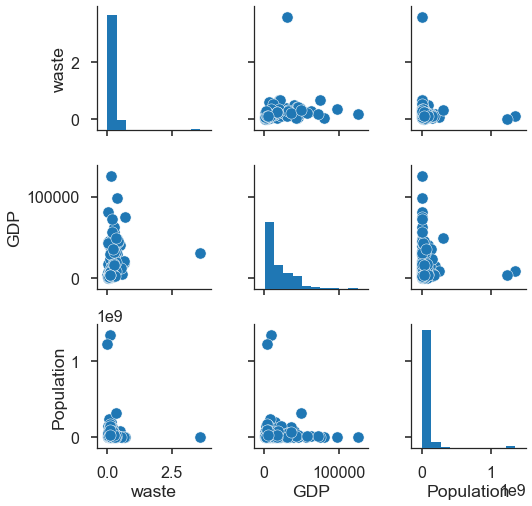

In [11]:
sns.pairplot(waste)

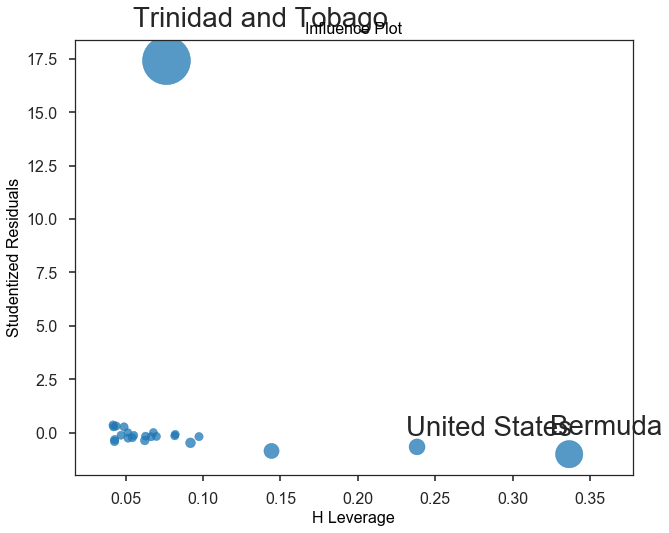

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
waste_NOAM.set_index('country', inplace=True)
m = ols('waste ~ GDP',waste_NOAM).fit()
fig, ax = plt.subplots(figsize=(10,8))
fig = sm.graphics.influence_plot(m, ax=ax, criterion="cooks")
plt.savefig('North America Influencers Waste  _ GDP.png')

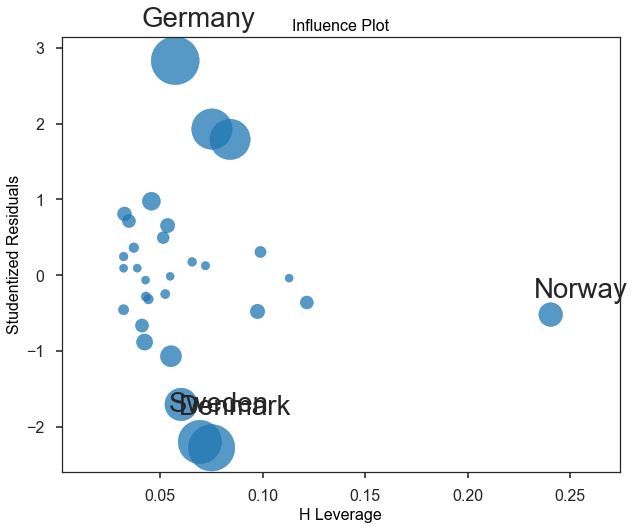

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
waste_EU.set_index('country', inplace=True)
m = ols('waste ~ GDP',waste_EU).fit()
fig, ax = plt.subplots(figsize=(10,8))
fig = sm.graphics.influence_plot(m, ax=ax, criterion="cooks")
plt.savefig('Europe Influencers Waste  _ GDP.png')

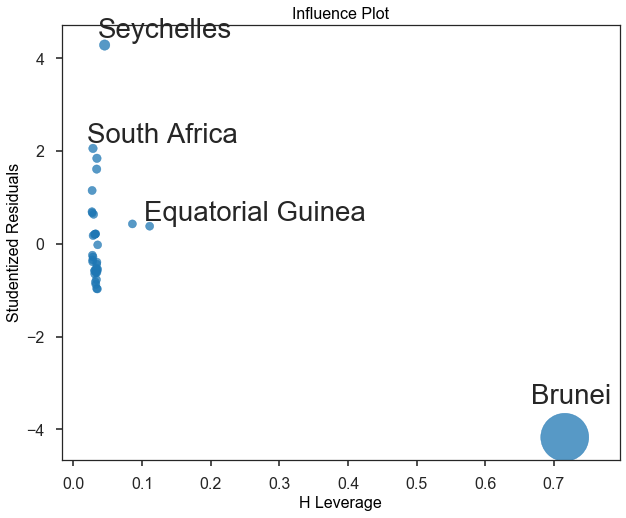

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
waste_AF.set_index('country', inplace=True)
m = ols('waste ~ GDP',waste_AF).fit()
fig, ax = plt.subplots(figsize=(10,8))
fig = sm.graphics.influence_plot(m, ax=ax, criterion="cooks")
plt.savefig('Africa Influencers Waste  _ GDP.png')

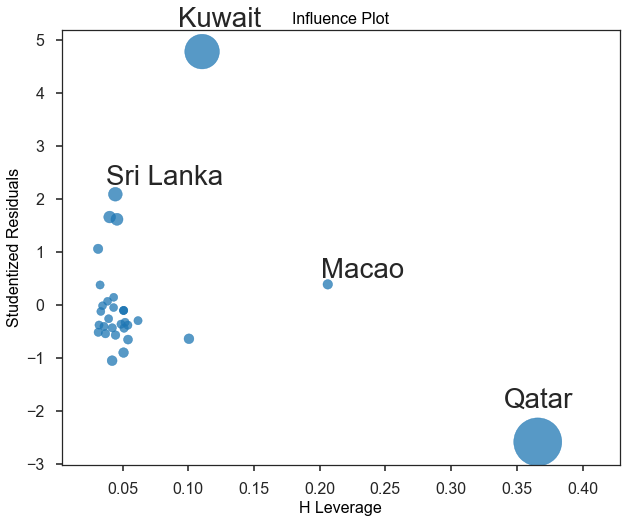

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
waste_AS.set_index('country', inplace=True)
m = ols('waste ~ GDP',waste_AS).fit()
fig, ax = plt.subplots(figsize=(10,8))
fig = sm.graphics.influence_plot(m, ax=ax, criterion="cooks")
plt.savefig('Asia Influencers Waste  _ GDP.png')

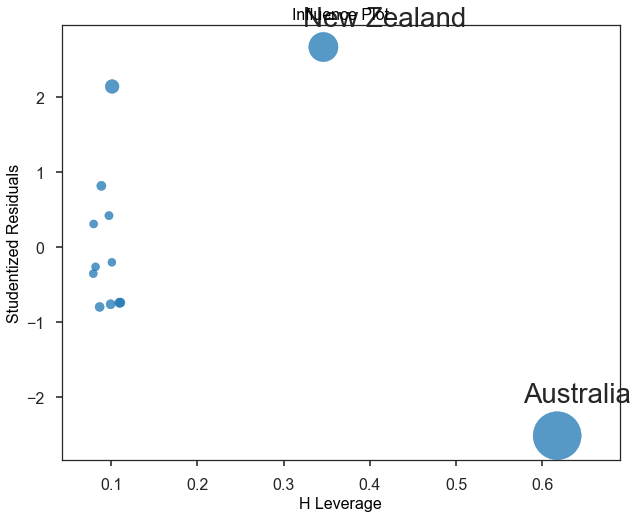

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
waste_OC.set_index('country', inplace=True)
m = ols('waste ~ GDP',waste_OC).fit()
fig, ax = plt.subplots(figsize=(10,8))
fig = sm.graphics.influence_plot(m, ax=ax, criterion="cooks")
plt.savefig('OC Influencers Waste  _ GDP.png')

In [17]:
Y = waste['waste']
X = waste['GDP']
print 
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.params)

const    0.139460
GDP      0.000003
dtype: float64


In [18]:
from sklearn.model_selection import train_test_split
y = waste['waste']
X = waste['GDP']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
results = lm.fit(X_train,y_train)
print (results)
print('Coefficients: \n',lm.coef_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Coefficients: 
 [0.00000000e+00 3.76880145e-06]


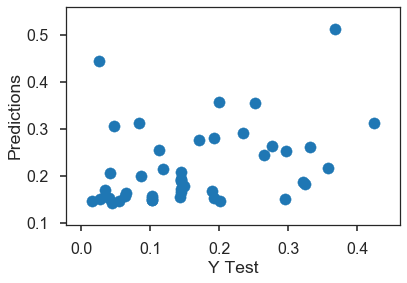

In [20]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')
plt.savefig('Trained Model Pridictions Waste  _ GDP.png')

In [21]:
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients

MSE:  0.01491904789647982
RMSE:  0.12214355446146072


,Coefficients
const,0.000000
GDP,0.000004


Text(0.5, 1.0, 'Adjusted GDP vs. Original waste')

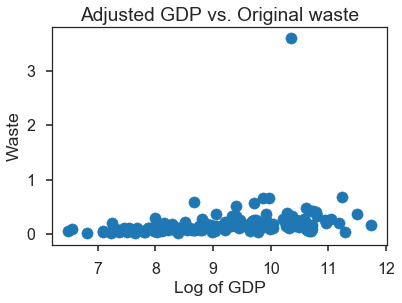

In [22]:
x = np.log(waste.GDP)
plt.scatter(x, waste.waste)

plt.xlabel("Log of GDP")
plt.ylabel("Waste")
plt.title("Adjusted GDP vs. Original waste")

C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\MHOUSHMA\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


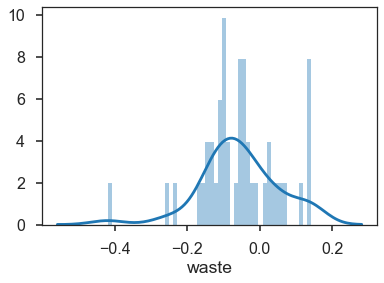

In [23]:
sns.distplot((y_test-predictions),bins=50)

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('waste ~ GDP',waste).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  waste   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     5.500
Date:                Sun, 04 Aug 2019   Prob (F-statistic):             0.0204
Time:                        13:53:02   Log-Likelihood:                -34.296
No. Observations:                 147   AIC:                             72.59
Df Residuals:                     145   BIC:                             78.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1395      0.035      3.986      0.0

In [25]:
coefficients = pd.DataFrame(results.coef_,X.columns)
coefficients.columns = ['Coefficients']
print (coefficients)

       Coefficients
const      0.000000
GDP        0.000004


Text(0.5, 1.0, 'Predictions vs. Original waste')

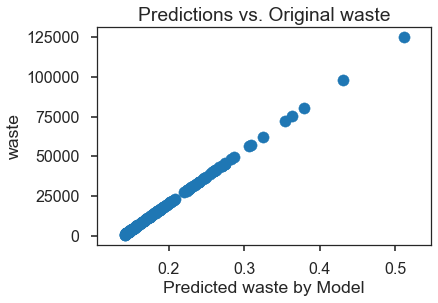

In [26]:
predicted_waste = m.fittedvalues

plt.scatter(predicted_waste, waste.GDP)

plt.xlabel("Predicted waste by Model")
plt.ylabel("waste")
plt.title("Predictions vs. Original waste")

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

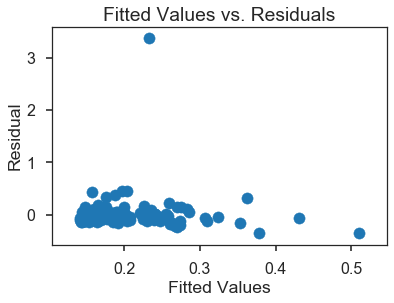

In [27]:
x = m.fittedvalues
y = m.resid
plt.scatter(x, y)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

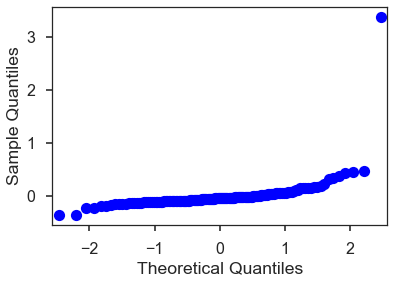

In [28]:
fig = sm.qqplot(m.resid)

Text(0.5, 1.0, 'Predictions vs. Original waste')

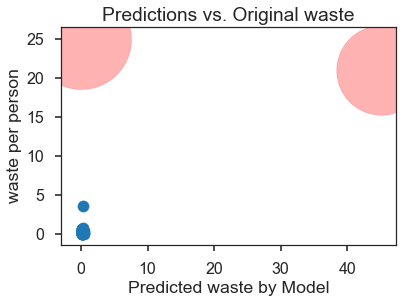

In [29]:
plt.scatter(-0, 25, s=10000, alpha=0.3, c = 'r' )
plt.scatter(45, 21, s=8000, alpha=0.3, c = 'r' )


predicted_waste = m.fittedvalues

plt.scatter(predicted_waste, waste.waste)

plt.xlabel("Predicted waste by Model")
plt.ylabel("waste per person")
plt.title("Predictions vs. Original waste")

In [30]:
waste['Fitted_Values'] = m.fittedvalues
m = ols('waste ~ GDP',waste).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  waste   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     5.500
Date:                Sun, 04 Aug 2019   Prob (F-statistic):             0.0204
Time:                        13:53:09   Log-Likelihood:                -34.296
No. Observations:                 147   AIC:                             72.59
Df Residuals:                     145   BIC:                             78.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1395      0.035      3.986      0.0

In [31]:
# Getting Index for Underpredicted Outliers
waste['Fitted_Values'] = m.fittedvalues
waste[waste.Fitted_Values < 5].head(2)

 

,country,Code,waste,GDP,Population,Continent,Fitted_Values
0,Albania,ALB,0.069,9927.18,3204284,EU,0.168915
1,Algeria,DZA,0.144,12870.60,35468208,AF,0.177648
